In [ ]:
'''
HELLO THERE WELCOME TO QUANTUM ARCADE !

ILL EXPLORE YOU THROUGH THIS DEMONTRATION

HOW THIS WORKS:
  1) USER IS REQUIRED TO CHOOSE A VALUE OF EITHER 0 OR 1
  2) COMPUTER IS ALSO REQUIRED TO CHOOSE A VALUE OF EITHER 0 OR 1
  
  3) IF COMPUTER COULD GUESS WHAT THE USER HAS CHOSEN : 'COMPUTER WINS'
  4) IF COMPUTER FAILS TO GUESS WHAT THE USER WILL CHOOSE : 'USER WINS'
  
WHAT YOU HAVE TO DO:
  1) JUST CHOOSE A VALUE OF 0 OR 1 IN ONE OF THE BLOCK BELOW! WE'LL SAY WHICH BLOCK!
  
 
 
 WE'LL EXPLORE YOU THROUGH THIS ARCADE
 HAVE FUN!
 TRY TO WIN AGAINST THIS QUANTUM COMPUTER

'''

In [1]:
'IMPORTING REQUIRED MODULES'
"MAKE SURE TO RUN ALL THE BLOCKS FROM NOW!"

from random import randint as rand
from qiskit import QuantumCircuit,assemble, Aer,transpile, execute,IBMQ, QuantumRegister, ClassicalRegister
import time
from qiskit.visualization import plot_histogram,plot_bloch_multivector
from qiskit.providers.ibmq import least_busy
provider = IBMQ.load_account()

In [2]:
#SETTING UP ARCADE

comp = QuantumRegister(1,'computer')
user = QuantumRegister(2,'user')
cr = ClassicalRegister(3,'result')

arcade = QuantumCircuit(comp,user,cr)


In [3]:
#NOW ITS YOUR TURN! EDIT THE CODE BELOW AND SET TO EITHER 0 OR 1


user_chosen = 0


##################### choose your value ^^^ ####################################################

try:
    test = int(user_chosen)
    if test != 0 and test != 1:
        test = ('invalid input')
        test = int(test)
except:
    raise ValueError

#INITIALIZING THE QUANTUM CIRCUIT AND RUNNING THE ARCADE
if user_chosen == 1:
   desired_initial = [ 0 ,0, 0 ,0 ,0 ,0 ,1 ,0 ]
   arcade.initialize(desired_initial,[user[0],user[1],comp[0]])

arcade.cx(user[0],user[1])
arcade.barrier()
arcade.h(comp)
arcade.cx(comp[0],user[1])

and_gate = QuantumCircuit(3)
and_gate.cx(0,1)
and_gate.cx(2,1)

and_ccx = and_gate.to_instruction()

arcade.append( and_ccx, [user[0],comp[0],user[1]])

arcade.barrier()
arcade.measure(comp[0],cr[0])
arcade.measure(user[0],cr[1])
arcade.measure(user[1],cr[2])


'''
backend = Aer.get_backend('qasm_simulator')
job = execute(arcade,backend,shots = 1,memory = True)
result = job.result()
memory = result.get_memory()
choices = memory[0]
computer_choice = choices[2]
'''

IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
                                   x.configuration().n_qubits >= 2 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

# Run our circuit on the least busy backend. Monitor# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor


transpiled_arcade_circuit = transpile(arcade, backend)
qobj = assemble(transpiled_arcade_circuit, shots=2048)
job = backend.run(qobj)

job_monitor(job, interval= 2)

result = job.result()
answer = result.get_counts()
ans = sorted(answer.items(), key = lambda x: x[1] )
output = dict(ans)
n = len(output)

out_keys = output.keys()
choice = list(out_keys)
chosen_output = choice[n-1]
computer_choice = chosen_output[2]


ibmqfactory.load_account:WARNING:2021-07-18 03:05:12,046: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmqx2


<ipython-input-3-f93c998e6bc2>:60: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


Job Status: job has successfully run


In [4]:
'''
YO ! THE RESULT IS OUT !
'''


print("Your Choice : {1} \n Computer's Choice : {0}  ".format(computer_choice,user_chosen))

if str(computer_choice) == str(user_chosen):
    print("Computer won the bet")
else:
    print("you've won the bet!")


Your Choice : 0 
 Computer's Choice : 0  
Computer won the bet


In [18]:
print(ans)
k = dict(ans)
print(k)

[('111', 23), ('011', 46), ('010', 55), ('110', 55), ('101', 139), ('001', 183), ('100', 718), ('000', 829)]
{'111': 23, '011': 46, '010': 55, '110': 55, '101': 139, '001': 183, '100': 718, '000': 829}


In [5]:
'''
HAHA! FEEL FREE TO TRY AGAIN ! 

BUT YOU HAVE VERY LESS CHANCE TO WIN THE ARCADE

BUT IF THIS ARCADE WAS RUN ON A QUANTUM SIMULATOR OR IDEAL QUANTUM DEVICE, 
THEN YOU CAN NEVER WIN AGAINST A COMPUTER!
'''

'\nHAHA! FEEL FREE TO TRY AGAIN ! \n\nBUT YOU HAVE VERY LESS CHANCE TO WIN THE ARCADE\n\nBUT IF THIS ARCADE WAS RUN ON A QUANTUM SIMULATOR OR IDEAL QUANTUM DEVICE, \nTHEN YOU CAN NEVER WIN AGAINST A COMPUTER!\n'

In [6]:
'''NOW LETS EXPLORE HOW THE QUANTUM COMPUTER IS ALWAYS WINNING THE BET! 

IN QUANTUM COMPUTING WE USE THREE MAIN PROPERTIES OF QUANTUM MECHANICS , THEY ARE:
 1) SUPERPOSITION
 2) ENTANGLEMENT
 3) QUANTUM INTERFERENCE
 
IN THE ABOVE QUANTUM ARCADE, WE USED SUPERPOSITION AND ENTANGLEMENT TO ACHIEVE THIS QUANTUM ADVANTAGE.

LETS DIG MORE!

'''


'NOW LETS EXPLORE HOW THE QUANTUM COMPUTER IS ALWAYS WINNING THE BET! \n\nIN QUANTUM COMPUTING WE USE THREE MAIN PROPERTIES OF QUANTUM MECHANICS , THEY ARE:\n 1) SUPERPOSITION\n 2) ENTANGLEMENT\n 3) QUANTUM INTERFERENCE\n \nIN THE ABOVE QUANTUM ARCADE, WE USED SUPERPOSITION AND ENTANGLEMENT TO ACHIEVE THIS QUANTUM ADVANTAGE.\n\nLETS DIG MORE!\n\n'

In [7]:
'''
IN THE ABOVE ARCADE WE FIRST CREATED A SUPERPOSITION OF 1 AND 0 AS COMPUTERS CHOICE
'''
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_multivector
comp = QuantumRegister(1,'computer')
user = QuantumRegister(2,'user')
cr = ClassicalRegister(3,'result')

arcade = QuantumCircuit(comp,user,cr)

arcade.h(comp)

plot_bloch_multivector(arcade)
'''
here we can see that , qubit 0 which we assigned as computer is on x axis
'''

'\nhere we can see that , qubit 0 which we assigned as computer is on x axis\n'

In [8]:
'''NOW LETS LOOK AT WHAT OUTPUT THESE ARE GIVING
IN THIS TUTORIAL WE'LL BE USING QASM SIMULATOR INSTEAD OF A REAL QUANTUM DEVICE.
USING A QASM SIMULATOR WILL GIVE A 100% PROBABILITY FOR A QUANTUM COMPUTER TO WIN!

'''

arcade.measure_all()
backend = Aer.get_backend('qasm_simulator')
job = execute(arcade,backend,shots=1000)
result = job.result()
counts = result.get_counts()
print(counts)

'''THIS MEANS THAT APPROXIMATELY 50% OF TIME WE ARE GETTING 1 ON QUBITO AND OTHER 50% TIMES WE'RE GETTING 0 '''

{'001 000': 509, '000 000': 491}


"THIS MEANS THAT APPROXIMATELY 50% OF TIME WE ARE GETTING 1 ON QUBITO AND OTHER 50% TIMES WE'RE GETTING 0 "

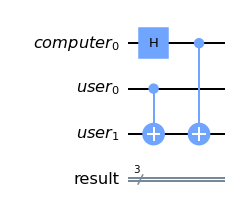

In [9]:
'''
LETS REDEFINE THE CIRCUIT AGAIN TO REMOVE THE MEASUREMENTS FROM PREVIOUS BLOCK
'''


comp = QuantumRegister(1,'computer')
user = QuantumRegister(2,'user')
cr = ClassicalRegister(3,'result')

arcade = QuantumCircuit(comp,user,cr)

arcade.h(comp)


'''
LETS LOOK AT THE CIRCUIT WHEN USER CHOOSES 0

YOU WOULD HAVE DOUBTED WHY QUBIT 1 AND QUBIT 2 WERE DESIGNATED FOR USERS RIGHT?
WELL, WE USE QUBIT 2 TO CREATE AN ENTANGLEMENT BETWEEN THE QUBIT 0 AND QUBIT 2

WE'LL TALK ABOUT THE QUBIT 1 LATER!
'''
user_chosen = 0
arcade.cx(user[0],user[1])
arcade.cx(comp[0],user[1])

#lets look at the circuit
arcade.draw()


In [10]:
'''NOW LETS LOOK AT WHAT OUTPUT THESE ARE GIVING'''

arcade.measure_all()
backend = Aer.get_backend('qasm_simulator')
job = execute(arcade,backend,shots=1000)
result = job.result()
counts = result.get_counts()
print(counts)

'''
WE CAN CLEARLY SEE THAT QUBIT-0 AND QUBIT-2 ARE ENTANGLED !
'''

{'000 000': 493, '101 000': 507}


'\nWE CAN CLEARLY SEE THAT QUBIT-0 AND QUBIT-2 ARE ENTANGLED !\n'

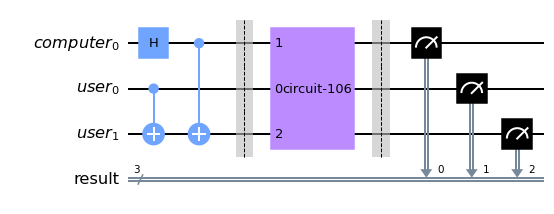

In [11]:
#REDEFENING THE CIRCUIT AGAIN!

comp = QuantumRegister(1,'computer')
user = QuantumRegister(2,'user')
cr = ClassicalRegister(3,'result')

arcade = QuantumCircuit(comp,user,cr)

user_chosen = 0

if user_chosen == 1:
    desired_initial = [ 0 ,0, 0 ,0 ,0 ,0 ,1 ,0 ]

    arcade.initialize(desired_initial,[user[0],user[1],comp[0]])

arcade.cx(user[0],user[1])
arcade.h(comp)
arcade.cx(comp[0],user[1])
arcade.barrier()



'''
NOW , SINCE THE COMPUTER WANTS TO WIN!
IT MUST BREAK THE SUPERPOSITION INTO A VALUE WHICH IS USER'S CHOICE
(REMEMBER SUPERPOSITION WAS COMPUTER'S INITIAL CHOICE!)
TO DO THAT, WE HAVE TO FLIP THE MEASUREMENT OF COMPUTER IF QUBIT-1 AND QUBIT-2 ARE DIFFERENT

SO NOW WE MAKE A CUSTOM GATE TO DO THIS OPERATION AND MEASURE THE CIRCUIT
'''

and_gate = QuantumCircuit(3)
and_gate.cx(0,1)
and_gate.cx(2,1)

and_ccx = and_gate.to_instruction()
arcade.append( and_ccx, [user[0],comp[0],user[1]])

arcade.barrier()
arcade.measure(comp[0],cr[0])
arcade.measure(user[0],cr[1])
arcade.measure(user[1],cr[2])

#LETS LOOK AT THE CIRCUIT
arcade.draw()

In [12]:
'''FINALLY WE ARE DONE WITH THE CIRCUIT!
NOW LETS RUN THIS ARCADE ON A SIMULATOR
'''

backend = Aer.get_backend('qasm_simulator')
job = execute(arcade,backend,shots = 2048)
result = job.result()
counts = result.get_counts()

answer = counts.keys()
answer = list(answer)

#here we're taking the first value from output,
# both the output would give the same result
choices = answer[0]

computer_choice = choices[2]


#LETS LOOK INTO THE RESULTS

print("Your Choice : {1} \n Computer's Choice : {0}  ".format(computer_choice,user_chosen))

# printing what we got as output
print("output taken from the simulator:")
print(choices) 

print("\n outputs which we received from Qasm Simulator")
print(counts)

Your Choice : 0 
 Computer's Choice : 0  
output taken from the simulator:
100

 outputs which we received from Qasm Simulator
{'100': 1027, '000': 1021}


In [38]:
'''
NOW LETS TRY TO GET THE OUTPUT FROM A REAL QUANTUM DEVICE 
REMEMBER THAT MORE THE NUMBER OF SHOTS THE BETTER OUR MODEL WILL BE
'''

IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x:
                                   x.configuration().n_qubits >= 3 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

# Run our circuit on the least busy backend. Monitor# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor


transpiled_arcade_circuit = transpile(arcade, backend)
qobj = assemble(transpiled_arcade_circuit, shots=2048)
job = backend.run(qobj)

job_monitor(job, interval= 2)

result = job.result()
answer = result.get_counts()
ans = sorted(answer.items(), key = lambda x: x[1] )
output = dict(ans)
n = len(output)

out_keys = output.keys()
choice = list(out_keys)
chosen_output = choice[n-1]
computer_choice = chosen_output[2]


ibmqfactory.load_account:WARNING:2021-06-06 07:05:00,272: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_belem


<ipython-input-38-e1e58b5f82b3>:21: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


Job Status: job has successfully run


In [66]:
'''
THE RESULT IS OUT !
'''


print("Your Choice : {1} \n Computer's Choice : {0}  ".format(computer_choice,user_chosen))

if str(computer_choice) == str(user_chosen):
    print("Computer won the bet")
else:
    print("User won the bet!")

  
print("\n")
#lets look at the output we got from our backend
print(answer)

Your Choice : 0 
 Computer's Choice : 0  
Computer won the bet


{'000': 438, '001': 437, '010': 105, '011': 98, '100': 411, '101': 373, '110': 83, '111': 103}


optimal output which the computer has chosen is :000


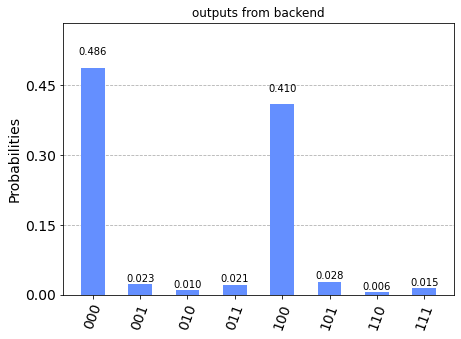

In [41]:
print("optimal output which the computer has chosen is :" + str(chosen_output))

plot_histogram(answer, title='outputs from backend')

In [ ]:
'''AS YOU CAN SEE THAT, THERE ARE MANY UNDESIRED OUTPUTS FROM THE REAL QUANTUM DEVICE.
IT IS DUE TO THE ERROR PRESENT IN THE REAL QUANTUM DEVICES.
'''

In [1]:
'''
HOPE YOU ENJOIYED!

Created by - MOHAMMAD ANSAH KURIYODATH
contact: mohdansah10@gmail.com

Idea adopted from : TEDWOMEN-2018-NOVEMBER by
    SHOHINI GHOSE 
    https://www.ted.com/talks/shohini_ghose_a_beginner_s_guide_to_quantum_computing#:~:text=Shohini%20Ghose%20explores%20the%20strange%20quantum%20world%20of,inclusive%20for%20people%20of%20all%20genders%20and%20backgrounds.    
   

THANKS TO QISKIT!
'''
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.17.4', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.14.0', 'qiskit-aqua': '0.9.2', 'qiskit': '0.27.0', 'qiskit-nature': '0.1.3', 'qiskit-finance': None, 'qiskit-optimization': '0.1.0', 'qiskit-machine-learning': None}